In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,BatchNormalization,Flatten
from keras.models import Sequential
from keras.optimizers import rmsprop_v2
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from keras.models import load_model
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import os
from keras.utils.np_utils import to_categorical
import seaborn as sns

In [2]:
int2emotions = {0:'Angry',1:'Fear',2:'Happy',3:'Neutral',4:'Sad',5:'Surprise'}
emotions2int = {'Angry':0,'Fear':1,'Happy':2,'Neutral':3,'Sad':4,'Surprise':5}

dic = {'images':[], 'labels':[], 'purpose':[]}
    
for d in os.listdir('fer2013/'):
    print(d)
    for emotion in os.listdir(f'fer2013/{d}'):
        print(emotion)
        for i in os.listdir(f'fer2013/{d}/{emotion}'):
            img = cv2.imread(f'fer2013/{d}/{emotion}/{i}',0)
            img = img.reshape(48,48,1)
            
            dic['images'].append(img)
            dic['labels'].append(emotion)
            
            if d=='train':
                dic['purpose'].append('T')
            else:
                dic['purpose'].append('V')

train
Angry
Fear
Happy
Neutral
Sad
Surprise
validation
Angry
Fear
Happy
Neutral
Sad
Surprise


In [3]:
df = pd.DataFrame(dic)
df.head()

,images,labels,purpose
0,"[[[72], [78], [81], [75], [59], [54], [63], [6...",Angry,T
1,"[[[152], [149], [147], [157], [146], [133], [1...",Angry,T
2,"[[[117], [116], [114], [99], [77], [54], [36],...",Angry,T
3,"[[[159], [159], [145], [159], [165], [162], [1...",Angry,T
4,"[[[254], [253], [255], [251], [235], [186], [1...",Angry,T


In [4]:
train_data = df[df['purpose']=='T']
val_data = df[df['purpose']=='V']

In [5]:
train_data.head()

,images,labels,purpose
0,"[[[72], [78], [81], [75], [59], [54], [63], [6...",Angry,T
1,"[[[152], [149], [147], [157], [146], [133], [1...",Angry,T
2,"[[[117], [116], [114], [99], [77], [54], [36],...",Angry,T
3,"[[[159], [159], [145], [159], [165], [162], [1...",Angry,T
4,"[[[254], [253], [255], [251], [235], [186], [1...",Angry,T


In [6]:
val_data.head()

,images,labels,purpose
28273,"[[[169], [117], [102], [89], [88], [74], [77],...",Angry,V
28274,"[[[137], [144], [65], [78], [91], [92], [96], ...",Angry,V
28275,"[[[8], [14], [8], [35], [148], [223], [241], [...",Angry,V
28276,"[[[83], [72], [63], [69], [79], [67], [87], [8...",Angry,V
28277,"[[[75], [80], [80], [80], [82], [92], [64], [2...",Angry,V


In [7]:
train_data['labels'].value_counts()

Happy       7215
Neutral     4965
Sad         4830
Fear        4097
Angry       3995
Surprise    3171
Name: labels, dtype: int64

In [8]:
val_data['labels'].value_counts()

Happy       879
Neutral     626
Sad         594
Fear        528
Angry       491
Surprise    416
Name: labels, dtype: int64

In [9]:
happy_df = train_data[train_data['labels']=='Happy'].sample(n=3171)
neutral_df = train_data[train_data['labels']=='Neutral'].sample(n=3171)
sad_df = train_data[train_data['labels']=='Sad'].sample(n=3171)
fear_df = train_data[train_data['labels']=='Fear'].sample(n=3171)
angry_df = train_data[train_data['labels']=='Angry'].sample(n=3171)
surprise_df = train_data[train_data['labels']=='Surprise'].sample(n=3171)

train_data = pd.concat([happy_df,neutral_df,sad_df,fear_df,angry_df,surprise_df])

train_data = train_data.sample(frac=1)
train_data.reset_index(inplace=True)
train_data.drop('index',inplace=True,axis=1)

train_data.head()

,images,labels,purpose
0,"[[[148], [163], [173], [175], [138], [122], [1...",Neutral,T
1,"[[[58], [43], [50], [62], [57], [49], [43], [3...",Angry,T
2,"[[[22], [0], [5], [17], [0], [16], [119], [229...",Angry,T
3,"[[[191], [176], [128], [137], [134], [145], [1...",Surprise,T
4,"[[[193], [192], [194], [194], [205], [212], [2...",Sad,T


In [10]:
train_data['labels'].value_counts()

Sad         3171
Angry       3171
Happy       3171
Surprise    3171
Fear        3171
Neutral     3171
Name: labels, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels', ylabel='count'>

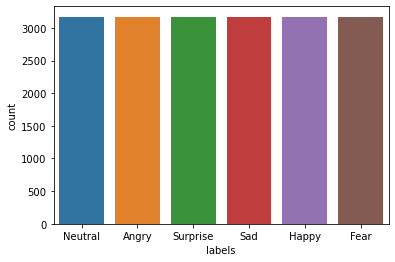

In [11]:
sns.countplot(train_data['labels'])

In [12]:
batch_size= 32
classes = 6
rows,columns=48,48

In [13]:
train_labels = list(train_data['labels'].replace(emotions2int))
train_labels = to_categorical(train_labels)

val_labels = list(val_data['labels'].replace(emotions2int))
val_labels = to_categorical(val_labels)

In [14]:
train_data = list(train_data['images'])
train_data = np.array(train_data)

val_data = list(val_data['images'])
val_data = np.array(val_data)

In [15]:
train_data.shape

(19026, 48, 48, 1)

In [16]:
val_data.shape

(3534, 48, 48, 1)

In [17]:
# batch_size= 32
# classes = 6
# rows,columns=48,48

# train_dir = 'fer2013\\train' 
# validation_dir = 'fer2013\\validation'

# train_gen = ImageDataGenerator(rescale=1./255,
#                               rotation_range=45,
#                               height_shift_range=0.3,
#                               width_shift_range=0.3,
#                               shear_range=0.2,
#                               horizontal_flip=True,
#                               fill_mode='nearest')

# validation_gen = ImageDataGenerator(rescale=1./255)

# training_data_generator = train_gen.flow_from_directory(train_dir,
#                                                        batch_size=batch_size,
#                                                        shuffle=True,
#                                                        color_mode='grayscale',
#                                                        class_mode='categorical',
#                                                        target_size=(rows,columns))

# valiadtion_data_generator = validation_gen.flow_from_directory(validation_dir,
#                                                        batch_size=batch_size,
#                                                        shuffle=False,
#                                                        color_mode='grayscale',
#                                                        class_mode='categorical',
#                                                        target_size=(rows,columns))




## Creating Our Model

In [18]:
model = Sequential()

# First Block
model.add(Conv2D(64,(3,3),activation='elu',input_shape=(rows,columns,1),kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='elu',input_shape=(rows,columns,1),kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Second Block
model.add(Conv2D(128,(3,3),activation='elu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='elu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Third Block
model.add(Conv2D(256,(3,3),activation='elu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='elu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fourth Block
model.add(Conv2D(512,(3,3),activation='elu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='elu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fifth Block
model.add(Flatten())
model.add(Dense(256,activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Sixth Block
model.add(Dense(128,activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Seventh Block
model.add(Dense(64,activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Eighth Block
model.add(Dense(classes,activation='softmax',kernel_initializer='he_normal'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [20]:
checkpoint = ModelCheckpoint('model\\6_class_emotion_detector_V2.h5',
                             save_best_only=True,
                             mode='min',
                             monitor='val_loss',
                             verbose=1)

earlystopping = EarlyStopping(patience=10,
                             verbose=1,
                             min_delta=0,
                             monitor='val_loss',
                             restore_best_weights=True)


callbacks = [checkpoint, earlystopping]

model.compile(metrics=['accuracy'],
             optimizer='rmsprop',
             loss='categorical_crossentropy')

train_samples = 28273
validation_samples = 3534
batch_size = 64
epochs=30

# Training Our Model

In [21]:
history = model.fit(train_data,
                    train_labels,
                    epochs=epochs,
                    steps_per_epoch=train_samples//batch_size,
                    validation_data=(val_data,val_labels),
                    validation_steps=validation_samples//batch_size,
                    callbacks=callbacks)

Epoch 1/30
441/441 [==============================] - 67s 105ms/step - loss: 2.4345 - accuracy: 0.1823 - val_loss: 1.8593 - val_accuracy: 0.2281ss: 2.441

Epoch 00001: val_loss improved from inf to 1.85933, saving model to model\6_class_emotion_detector_V2.h5
Epoch 2/30
441/441 [==============================] - 44s 100ms/step - loss: 1.7370 - accuracy: 0.2698 - val_loss: 1.5590 - val_accuracy: 0.3831oss: 1

Epoch 00002: val_loss improved from 1.85933 to 1.55897, saving model to model\6_class_emotion_detector_V2.h5
Epoch 3/30
441/441 [==============================] - 44s 100ms/step - loss: 1.4838 - accuracy: 0.3964 - val_loss: 1.5069 - val_accuracy: 0.4270

Epoch 00003: val_loss improved from 1.55897 to 1.50687, saving model to model\6_class_emotion_detector_V2.h5
Epoch 4/30
441/441 [==============================] - 45s 102ms/step - loss: 1.3203 - accuracy: 0.4815 - val_loss: 1.4112 - val_accuracy: 0.4570

Epoch 00004: val_loss improved from 1.50687 to 1.41115, saving model to model\

# Live Predictor

In [23]:
model = load_model('model\\6_class_emotion_detector_V2.h5')
cap = cv2.VideoCapture(0)

classifier = cv2.CascadeClassifier('Haarcascades\\haarcascade_frontalface_default.xml')

def detect_face(frame):
    faces=classifier.detectMultiScale(frame,1.3,4)
    if faces==():
        return frame
    for x,y,w,h in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(172,42,251),2)
        face = frame[y:y+h,x:x+w]
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        face = cv2.resize(face,(48,48))
        face = face.reshape(1,48,48,1)
        cv2.putText(frame,text=int2emotions[np.argmax(model.predict(face))],
                    org=(x,y-15),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(106,40,243),thickness=2)
    return frame

while 1:
    ret,frame= cap.read()
    if ret==True:
        cv2.imshow('emotion_detector',detect_face(frame))
        if cv2.waitKey(1)==27:
            break
cap.release()
cv2.destroyAllWindows()

<ipython-input-23-3171db864daa>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces==():
